## <p style="text-align: center;">MIS 284N - Big Data and Distributed Programming</p>
## <p style="text-align: center;">Project 2 - Machine Learning using Scikit and AWS</p>
## <p style="text-align: center;">Total points: 100</p>
## <p style="text-align: center;">Due: Friday, October 4 submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

This project is about giving exposure about Machine learning, its usage, Cloud services and why they are helpful in analyzing Big Data.

In this Project, we are trying to analyze the crime data. This data is taken from <a href=https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2/data> here </a>. You have to download data from here, it should be around 1.6 GB in size. You have to predict type of crime that can happen given the features.

You have to complete all the four tasks and report your observations for each if any.

Note: Please post clarification questions on Piazza. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import time

In [2]:
crime_df = pd.read_csv('crimes16-19.csv')

In [3]:
print(crime_df.iloc[0])

ID                                                 11834500
Case Number                                        JC440683
Date                                 09/19/2019 11:55:00 PM
Block                                       019XX W 79TH ST
IUCR                                                   1310
Primary Type                                CRIMINAL DAMAGE
Description                                     TO PROPERTY
Location Description                             RESTAURANT
Arrest                                                False
Domestic                                              False
Beat                                                    611
District                                                  6
Ward                                                     17
Community Area                                           71
FBI Code                                                 14
X Coordinate                                    1.16458e+06
Y Coordinate                            

# Task 1 - Read the data and filter the data you need

This is open ended, you can use any features you want and drop any one of them. The 'Primary Type' is our target variable which we will be predicting for.
This task is split into multiple parts:


1.   Print the Histogram of variable 'Primary Type'. The x-axis should be each primary type, and the y-axis will the the count of each Primary type.
2. Sort the histogram in decreasing order. This will help you to understand which Primary Type of crime occured more than the rest. 
3. Now, 'K' is the total number of classes in Primary Type. Experiment with K=2,3,4,5 as the most popular Primary Type data to be used and predicted. 
4.  Given a percentage 'P', find the most number of 'K' your local system can handle during data loading, training and prediction. Report that 'K'. Ideally, you should test for a 'P' value of 60%. Meaning, you should have used 60% of the total data you are given. If you are given 1000 samples, you should use at least 600 samples and split that into train and test. 
5.  For each K=2,3,4,5 and percentage 'P', you should have trained a model and report the accuracy. (Refer to other tasks)
Hint: Split your data for each k=2,3,4,5 and P values and run individual models on them. 
Split the data into training and testing in the ratio of 80:20.

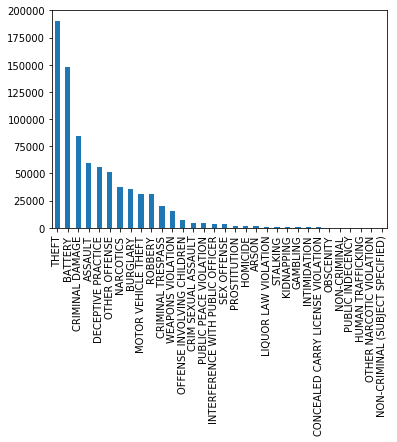

In [4]:
#1.1 and 1.2
counts = crime_df["Primary Type"].value_counts()
counts.plot.bar()

In [5]:
#1.3 is covered in 1.5

In [12]:
#1.4
given_p = float(input("Give desired percentage (.6 for 60%): "))
k = 2
crimes = [x[0] for x in counts[:k].items()]
k_crimes = crime_df.loc[crime_df['Primary Type'].isin(crimes)]
p = len(k_crimes.index) / len(crime_df.index)
while p < given_p:
    k += 1
    crimes = [x[0] for x in counts[:k].items()]
    k_crimes = crime_df.loc[crime_df['Primary Type'].isin(crimes)]
    p = len(k_crimes.index) / len(crime_df.index)
print("K value that first exceeds given P value of {} is K {} with actual P of {}".format(given_p,k,round(p,4)))

Give desired percentage (.6 for 60%): .6
K value that first exceeds given P value of 0.6 is K 4 with actual P of 0.6087


In [16]:
#1.5
for k in range(2,6):
    crimes = [x[0] for x in counts[:k].items()]
    k_crimes = crime_df.loc[crime_df['Primary Type'].isin(crimes)].drop(['ID','Case Number','Date','Block',
                                     'FBI Code','Location','Description',
                                     'Location Description','Updated On'],
                                    axis=1).dropna()
    
    X = k_crimes.drop('Primary Type', axis=1)
    X = pd.get_dummies(X)
    
    y = k_crimes['Primary Type']
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=0)
    
    #train model
    lr = LogisticRegression(C=10.0, random_state=0)
    lr.fit(X_train, y_train)
    
    #test model
    y_pred = lr.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    
    p = len(k_crimes.index) / len(crime_df.index)
    
    print(pd.Series([int(k),p*100,accuracy*100], index = ['k','p','accuracy']))
    print()

C:\Users\beads\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


k            2.000000
p           42.159722
accuracy    58.341453
dtype: float64



C:\Users\beads\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\beads\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


k            3.000000
p           52.709069
accuracy    47.446673
dtype: float64



C:\Users\beads\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\beads\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


k            4.000000
p           60.173749
accuracy    41.097761
dtype: float64



C:\Users\beads\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\beads\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


k            5.000000
p           66.772716
accuracy    36.983332
dtype: float64



1.5 is below in task

# Task 2 - Convert the features in a form that can be given as input to scikit library/functions

Here you have to search a little bit. The data that we are using has data other than numerical values. The model takes values as numerical or categorical data. You need to convert the input data to either one of these forms. 

In [25]:
t0 = time.process_time_ns()
features_crime_df = pd.get_dummies(crime_df.dropna().drop(['ID','Case Number','Date','Block',
                                     'FBI Code','Location','Description',
                                     'Location Description','Updated On','Primary Type'],
                                    axis=1))
features_crime_df["Primary Type"] = crime_df.dropna()["Primary Type"]
print(f'Local time to process data and convert is {time.process_time_ns() - t0:,} ns')

(776527, 364)
Local time to process data and convert is 6,125,000,000 ns


AWS time to process data and convert is **put value here**

# Task 3 - Build the model

Once the features are made converted to the form accepted by scikit library, you have to build a machine learning model. Given the features predict the type of crime. 
Report the accuracy, F1, Precision and Recall of the model.

In [26]:
k = int(input("Give a k value (or leave blank for default value of 4):") or 4)
t0 = time.process_time_ns()

crimes = [x[0] for x in counts[:k].items()]
k_crimes = features_crime_df.loc[features_crime_df['Primary Type'].isin(crimes)]
X = k_crimes.drop('Primary Type', axis=1)

y = k_crimes['Primary Type']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

t1 = time.process_time_ns()
data_time = t1-t0

lr = LogisticRegression(C=10.0, random_state=0)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

p = len(k_crimes.index) / len(features_crime_df.index)

accuracy = accuracy_score(y_test,y_pred)
model_time = time.process_time_ns() - t1
print(pd.Series(['Multivariate LR',k,p*100,accuracy*100,'f1val','precisval','recalval',
                 f'{data_time:,}',f'{model_time:,}','local'], 
            index = ['Model','k','p (%)','Accuracy','F1','Precision','Recall',
                     'Data Processing/Feature Conversion Time (ns)','Model Train & Test Time (ns)',
                     'Machine']))

Give a k value (or leave blank for default value of 4):


C:\Users\beads\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\beads\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Model                                           Multivariate LR
k                                                             4
p (%)                                                   61.3053
Accuracy                                                40.9438
F1                                                        f1val
Precision                                             precisval
Recall                                                 recalval
Data Processing/Feature Conversion Time (ns)      2,890,625,000
Model Train & Test Time (ns)                     19,640,625,000
Machine                                                   local
dtype: object



# Task 4 - Run the model on your laptop and AWS cloud and observe the time taken for reading the data, training and testing, report the same.  

Report your observations. Due to more RAM needed for the same, it might be the case that it doesn't run on your laptop, so in that case report your laptop configuration and state it didnt run.

# Task 5 - Run K-fold cross validation and report the accuracy for a cv = 5. 
Report the total amount of time taken to run it on your laptop and AWS